# Project 3: Stellar Atmospheres : The Physics of Why A stars have strong(est) Balmer Lines?

NAME: Madison Vaughan

UTEID: mgv562

DATE: November 13th, 2022


Goals: The goal of this project is to use our understanding of the physics of stellar atmospheres to figure out why A stars (with Temperatures near 10,000 K) have very strong Balmer lines. 
Data sets: None

Points: 80


Lets begin by loading our libraries: 



In [1]:
#lets make a plots interactive
%matplotlib widget 

#Importing libraries 
import numpy as np
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
import scipy.stats
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Galactic
from astropy.coordinates import ICRS
import astropy.coordinates as apycord
import random
from cycler import cycler
import astropy.table

#Lets set some of the default parameters for plotting. This cell is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0

p.rcParams['font.size']= 15.0
p.rcParams['axes.labelsize']=16.0
p.rcParams['axes.unicode_minus']=False
p.rcParams['xtick.major.size']=6
p.rcParams['xtick.minor.size']=3
p.rcParams['xtick.major.width']=1.5#2.0
p.rcParams['xtick.minor.width']=1.0
p.rcParams['axes.linewidth']=2.5
p.rcParams['axes.titlesize']=20#'large'
p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
p.rcParams['ytick.labelsize']=20 #'x-large'
p.rcParams['ytick.major.width']=2.0 #4
p.rcParams['ytick.minor.width']=1.0 #2.0

## Define the constants in CGS
Lets begin by defining some key constants in CGS (speed of light, boltzmaaan constant, electron mass, planck's constant, ...

In [2]:
#5pts answer here
k = (8.617e-5)*1.60218e-12 #boltzmann constant in ergs/K
h = (6.582e-16)*1.60218e-12 #plancks constant in ergs/s
me = 9.1093e-28 #mass electron in g

# Coding up the Boltzmann Equation
Lets write a defintion that take as input the the energy differences between two levels, the temperature of the gas and the density of states, and any other key information and outputs the ratio of the number density of atoms/ion in energy state A versus that of B. 

In [3]:
# 5pts

def Boltzmann_Eq(dE,T,gA,gB):
    na_nb = (gA/gB)*np.exp(-(dE)/(k*T))
    return na_nb

Q1: Determine the ratio of the H atoms which are at N=2 vs those at N=1 for a H gas at the temperature of the solar photosphere (5777K) (2pts)


In [4]:
#insert answer / calculation here
T = 5777
nA = 2
nB = 1

def degeneracyH(n):
    gn = 2*n**2
    return gn
def energyoflevel(n):
    E = -(13.6*1.60218e-12)/(n**2) # 13.6 eV ground state for hydrogen
    return E
EA = energyoflevel(nA)
EB = energyoflevel(nB)
dE = EA-EB
gA = degeneracyH(nA)
gB = degeneracyH(nB)
ratio = Boltzmann_Eq(dE,T,gA,gB)
ratio

5.050927336767943e-09

A1: There is a ratio of 5.051e-9 for the H atoms at N=2 vs N=1 at 5,777 K

Q2: Determine the ratio of the H atoms which are at N=2 vs those at N=1 for a H gas at the temperature an EXTREAMLY hot H gaseous photosphere (85,000K) (2pts)


In [5]:
#insert answer / calculation here
T2 = 85000
ratio2 = Boltzmann_Eq(dE,T2,gA,gB)
ratio2

0.9937181438988312

A2: There is a ratio of 0.9937 for the H atoms at N=2 vs N=1 at 85,000 K

## Coding up the Partition Function
In order to determine to fraction of total population of atoms/ion at N=2 we need to know the total number of atoms across all states (via the partition function). Next write a function/definition that derives the parition functions given a temperature and the number of levels (num_levels) to sum over. 

In [6]:
#10 pts
def partition_function(T, num_levels):
    n = 1
    Z = []
    for i in range(num_levels):
        g = degeneracyH(n)
        E = energyoflevel(n) -(-13.6*1.60218e-12)
        Z.append(g*np.exp(-E/(k*T))) 
        n = n+1
    return sum(Z)

Q3: What is the partition function of a pure HI gas that is 10,000K when summing over just the first 2 energy level? (2pts)

In [7]:
#enter calculation here
T3 = 10000
nlevels = 2
Z3 = partition_function(T3,nlevels)
print('The partition function is =',Z3)

The partition function is = 2.0000578518733083


A3: The partition function is 2.000058, summing over the first 2 energy levels

Q4: What is the partition function of a pure HI gas that is 10,000K when summing over just the first 5 energy level? (2pts)

In [8]:
T3 = 10000
nlevels = 5
Z4 = partition_function(T3,nlevels)
print('The partition function is =',Z4)

The partition function is = 2.000097535590774


A4: The partition function is 2.000098, summing over the first 5 energy levels

Use what you have learned above to write down a function which defines the fraction of atoms in N=2 (i.e. $\frac{n2}{n1+n2}$)

In [9]:
#10 pts
def Boltzmann_frac(n,T,nlevels):
    Z = partition_function(T,nlevels)
    g = degeneracyH(n)
    E = energyoflevel(n) -(-13.6*1.60218e-12)
    top = g*np.exp(-E/(k*T))
    f = top/Z;
    return f

Q5: Determine the fraction of atoms/ion in a pure H gas of temperature of the gas  T~85000 K that are in the fundemental state (n=1). (2pts)

In [10]:
## insert answer here; 5pts
n = 1
T = 85000
nlevels = 2 # I am choosing to do the partition function over the first 2 energy levels for this question
f = Boltzmann_frac(n,T,nlevels)
f

0.5015754122819197

A5:  The fractions of atoms in pure H gas at 85000 K is around 0.5016 (when I iterate across the first 2 energy levels - that number decreases as I increase the number of energy levels). I think this makes sense because at higher temperatures, we would expect less H atoms to be at the fundamental state since the higher temps cause more excitation and more electrons try to jump to higher levels. So as we take more energy levels into consideration, the fraction for n=1 lowers because theres a higher probability that there are more H atoms at those higher energy levels.

## Plotting the Boltzmann Equation

For a pure H gas, plot the fraction of atoms/ions that are in the ground (n=1) state as a function of the temperature of the gas (the temperature should range from 500 to 100,000 K). On the same figure, plot the first excited (i.e. Balmer; n=2) state using a different colored line. For this task you can sum over the first 2 energy levels for the partition function. Make sure to label your plot and provide axis labels.

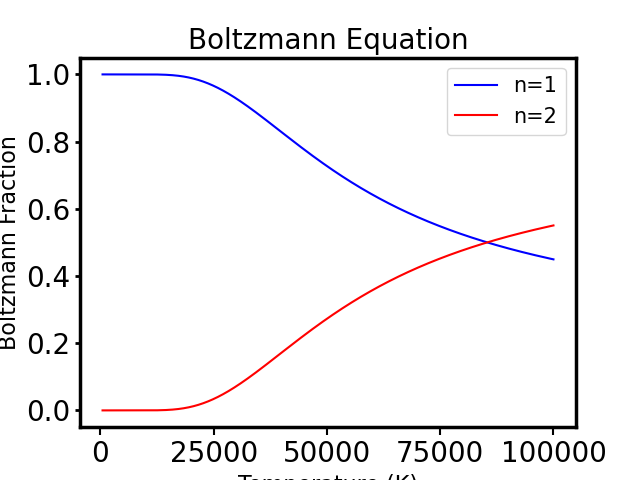

In [11]:
#insert answer here 10pts
Temps = np.arange(500,100000,1)
nlevels = 2 # summing over first 2 energy levels
n1 = 1
n2 = 2
f1 = Boltzmann_frac(n1,Temps,nlevels)
f2 = Boltzmann_frac(n2,Temps,nlevels)
p.figure()
p.plot(Temps,f1,'b')
p.plot(Temps,f2,'r')
p.title('Boltzmann Equation')
p.xlabel('Temperature (K)')
p.ylabel('Boltzmann Fraction')
p.legend(['n=1','n=2']);

# Coding up the Saha Equation
Lets write a defintion that take as input the temperature of the gas, the number of levels to sum the partition function over, the ionization energy of the H gas and the number density of electrons in the gas and outputs the ratio of the number of atoms of H in neutral vs singly ionized. 

In [12]:
# answer here 5pts
def saha_Eq(T,num_levels,xi,ne):
    ZHII = 1
    ZHI = partition_function(T,num_levels);
    HII_HI = ((2*ZHII)/(ne*ZHI))*(((2*np.pi*me*k*T)/(h**2))**(3/2))*np.exp(-xi/(k*T));
    return HII_HI
def saha_frac(T,num_levels,xi,ne):
    HII_HI = saha_Eq(T,num_levels,xi,ne);
    HII_tot = 1/(HII_HI+1);
    return HII_tot

Q6: Using the above definition determine how much of a pure H gas at 5777K with an electron density of 10$^{12}$ cm$^{-2}$ is singly ionized. For simiplicity just sum of 2 energy levels in the partition function. (2pts)

In [13]:
#Compute Q6 here
T = 5777
xi = 13.6*1.60218e-12 
num_levels = 2 # only sum of 2 energy levels
ne = 1e12
HII_HI = saha_Eq(T,num_levels,xi,ne) # gives number of HII over HI atoms
HII_tot = saha_frac(T,num_levels,xi,ne) # gives HI over total
HII_tot

0.7358658476346379

A6: A 0.9653 fraction of pure H gas is singly ionized at 5777 K.

Q7: Using the above definition determine how much of a pure H gas at 85,000K with an electron density of 10$^{12}$ cm$^{-2}$ is singly ionized. For simiplicity just sum of 2 energy levels in the partition function. (2pts)

In [15]:
#Compute Q7 here
T = 85000
xi = 13.6*1.60218e-12 
num_levels = 2 # only sum of 2 energy levels
ne = 1e12 
HII_HI = saha_Eq(T,num_levels,xi,ne)
HII_tot = saha_frac(T,num_levels,xi,ne)
HII_tot

8.600826993625377e-13

A7: A 8.601e-12 fraction of pure H gas is singly ionized at 85,000 K.

## Visualizing the Saha Equation 

For a pure H gas, plot the fraction of HI atoms as in the gas as function of the temperature of the gas (the temperature should range from 500 to 100,000 K). On the same figure (but with a different line color), plot the fraction of HII atoms as in the gas as function of the temperature of the gas (the temperature should range from 500 to 100,000 K)  For this task you can sum over the first 2 energy levels for the partition function. Make sure to label your plot and provide axis labels.

For this, assume that the pure H gas has an electron pressure of P$_e$ = 200 dyn cm$^{-2}$ (similar electron pressure in stars) and behaves like an ideal gas. 

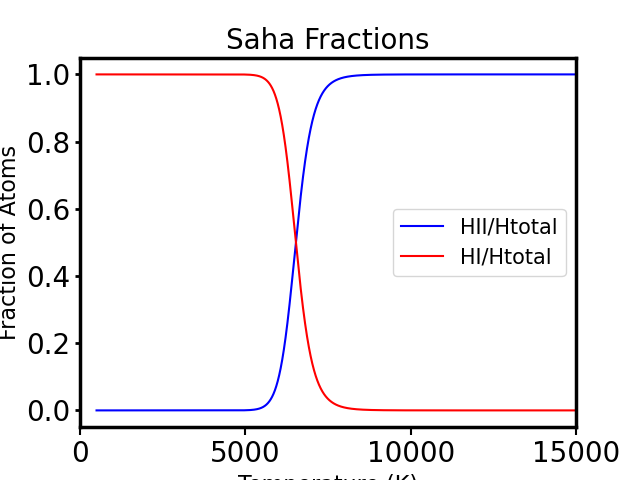

In [16]:
#insert answer here 10pt
Temps = np.arange(500,50000,1)
xi = 13.6*1.60218e-12
num_levels = 2 # only sum of 2 energy levels
ne = 10e12 
HII_HI = saha_Eq(T,num_levels,xi,ne)
HII_tot = saha_frac(Temps,num_levels,xi,ne)
HI_tot = 1 - HII_tot
p.figure()
p.plot(Temps,HI_tot,'b')
p.plot(Temps,HII_tot,'r')
p.title('Saha Fractions')
p.xlabel('Temperature (K)')
p.ylabel('Fraction of Atoms')
p.xlim(0,15000)
p.legend(['HII/Htotal','HI/Htotal']);

Q8: Using the above figure, at what temperature is more than 50% of this pure H gas singly ionized? (2pts)

A8: Estimating from the graph, this 50% point (AKA the intersection of the lines which is at 0.5 fraction) occurs near T = 6500 K

## Putting it all Together: Visualize the Saha and Boltzmann Equations 

Now for the same gas plot the fraction of atoms at N=2 multiplied by the fraction of neutral atoms, i.e.
$\frac{N_1}{N_1+N_2} \times \frac{N_I}{N_I+N_{II}} $ as a function of temperature (ranging between 500, 25,000 K)

The left hand side comes from the Boltzmann Equation while the right hand side comes from the Saha Equation.

Text(0, 0.5, 'Fraction')

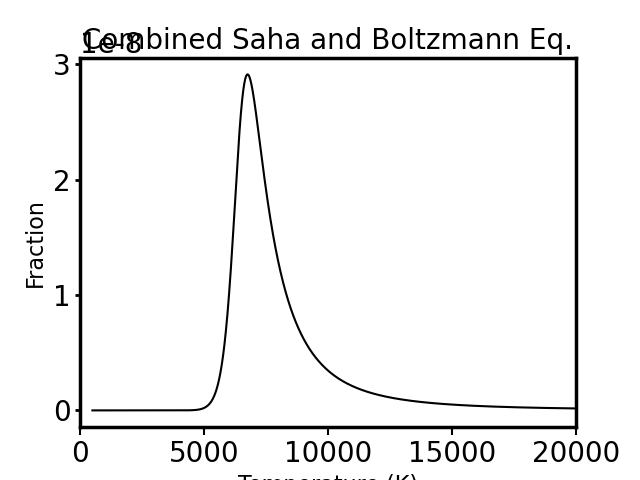

In [17]:
#10pts 
n2 = 2
num_levels = 2 # only sum of 2 energy levels
Temps = np.arange(500,50000,1)
N2_N1 = Boltzmann_frac(n2,Temps,num_levels)
N2_tot = 1/(1+N2_N1)

xi = 13.6*1.60218e-12
ne = 10e12 
HII_tot = saha_frac(Temps,num_levels,xi,ne)
p.figure()
p.plot(Temps,HII_tot*N2_N1)
p.xlim(0,20000)
p.title('Combined Saha and Boltzmann Eq.')
p.xlabel('Temperature (K)')
p.ylabel('Fraction')

Q9: Using the above plot, at what temperature is does the fraction of the HI multiplied by the fraction of atoms at n=2 peak (i.e. at what temperature are the balmer lines going to be strongest). Which spectral type of star has this temperature? (4pts)


A9: The temperature given by this graph seems to peak around 7500 K (maybe a bit higher due to the skew to the right, my calculations might be a little off), which is a spectral type A star. This actually does follow our conceptual understanding that the Balmer Series is most strong in A spectral type stars.